In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r'C:\Users\Shubham Dandak\Downloads\Supplychain train dataset.xlsx')

In [3]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

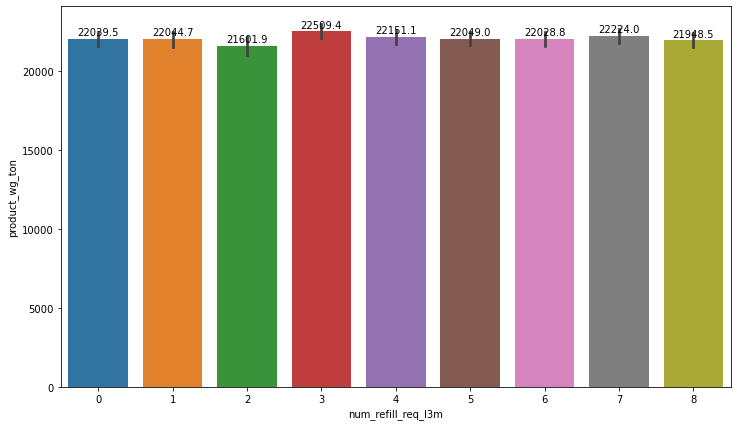

In [4]:
plt.figure(figsize=(12,7))
p = sns.barplot(x='num_refill_req_l3m',y='product_wg_ton', data=data)
show_values(p)

In [5]:
data.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

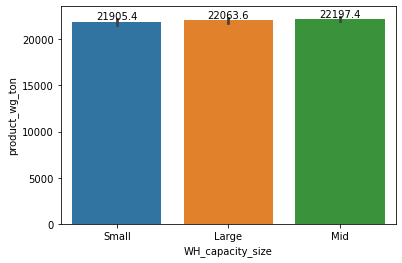

In [6]:
p = sns.barplot(x='WH_capacity_size',y='product_wg_ton', data=data)
show_values(p)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

# Hypothesis testing

In [8]:
prod_wg_tn = data[['product_wg_ton']]

In [9]:
prod_wg_tn_mean = np.mean(prod_wg_tn)
print(prod_wg_tn_mean)

product_wg_ton    22086.780813
dtype: float64


C:\Users\Shubham Dandak\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [10]:
from scipy.stats import ttest_1samp

In [11]:
prod_wg_tn = np.array(prod_wg_tn)

In [12]:
prod_wg_tn.flatten()

array([17115,  5074, 23137, ..., 24072, 15055, 14103], dtype=int64)

In [13]:
ttest,p_value = ttest_1samp(prod_wg_tn,22086)
print(p_value)

[0.99202512]


In [14]:
prod_wg_tn

array([[17115],
       [ 5074],
       [23137],
       ...,
       [24072],
       [15055],
       [14103]], dtype=int64)

In [15]:
product_wgt_tonn = data[['product_wg_ton']]

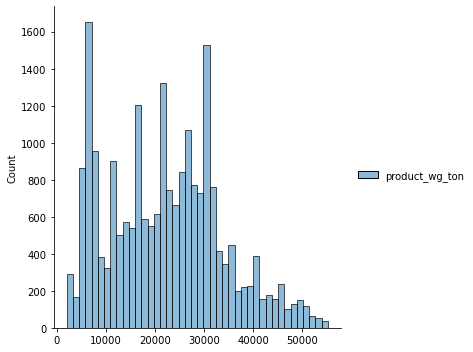

In [16]:
sns.displot(product_wgt_tonn)

In [17]:
from scipy.stats import shapiro
stat, p = shapiro(product_wgt_tonn)
print('Stat = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

Stat = 0.9700682163238525 and p value is 0.0
The data is not normally distributed


C:\Users\Shubham Dandak\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

## Deriving hypo for numerical columns through correlation

In [19]:
# Number of refills and product weight tonnes
from scipy.stats import spearmanr
stat, p = spearmanr(data['num_refill_req_l3m'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Number of refill in last three months')
else:
    print('product weight tonne is dependent on Number of refill in last three months')

Stats = 0.003248487075130269 and p value is 0.6287817222614869
product weight tonne is independent from Number of refill in last three months


In [20]:
from scipy.stats import pearsonr
stat, p = pearsonr(data['num_refill_req_l3m'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Number of refill in last three months')
else:
    print('product weight tonne is dependent on Number of refill in last three months')

Stats = 0.0006757738058120872 and p value is 0.9198926749298368
product weight tonne is independent from Number of refill in last three months


#### transport_issue_l1y and product weight tonn

In [21]:
stat, p = spearmanr(data['transport_issue_l1y'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Transport issues in last one year')
else:
    print('product weight tonne is dependent on Transport issues in last one year')

Stats = -0.17294635880655115 and p value is 2.785620419931492e-148
product weight tonne is dependent on Transport issues in last one year


In [22]:
stat, p = pearsonr(data['transport_issue_l1y'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Transport issues')
else:
    print('product weight tonne is dependent on Transport issues in last one year')

Stats = -0.1757460027001448 and p value is 3.9426614757023443e-153
product weight tonne is dependent on Transport issues in last one year


### Competitor_in_mkt and product weight tonn

In [23]:
stat, p = spearmanr(data['Competitor_in_mkt'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Number of competitor')
else:
    print('product weight tonne is dependent on Number of competitor')

Stats = 0.00836239462535314 and p value is 0.21330958603164005
product weight tonne is independent from Number of competitor


In [24]:
stat, p = pearsonr(data['Competitor_in_mkt'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Number of competitor')
else:
    print('product weight tonne is dependent on Number of competitor')

Stats = 0.00728200403527571 and p value is 0.2784868184128177
product weight tonne is independent from Number of competitor


### retail_shop_num and product weight tonnes

In [25]:
stat, p = spearmanr(data['retail_shop_num'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Retail shop number')
else:
    print('product weight tonne is dependent on Retail shop number')

Stats = -0.007814421629605738 and p value is 0.24484459310846254
product weight tonne is independent from Retail shop number


In [26]:
stat, p = pearsonr(data['retail_shop_num'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Retail shop number')
else:
    print('product weight tonne is dependent on Retail shop number')

Stats = -0.006785298435100314 and p value is 0.3125900710561325
product weight tonne is independent from Retail shop number


## distributor_num and product weight tonnes

In [27]:
stat, p = spearmanr(data['distributor_num'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Distributor number')
else:
    print('product weight tonne is dependent on Distributor number')

Stats = 0.00541053360982928 and p value is 0.4207022797001365
product weight tonne is independent from Distributor number


In [28]:
stat, p = pearsonr(data['distributor_num'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Distributor number')
else:
    print('product weight tonne is dependent on Distributor number')

Stats = 0.005142895181674207 and p value is 0.4440497152204103
product weight tonne is independent from Distributor number


### flood_impacted and product weight tonnes

In [29]:
stat, p = spearmanr(data['flood_impacted'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from flood_impacted column')
else:
    print('product weight tonne is dependent on flood_impacted column')

Stats = -0.004671303312233556 and p value is 0.4869369651172233
product weight tonne is independent from flood_impacted column


In [30]:
stat, p = pearsonr(data['flood_impacted'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from flood_impacted column')
else:
    print('product weight tonne is dependent on flood_impacted column')

Stats = -0.00505528832615786 and p value is 0.4518498395140295
product weight tonne is independent from flood_impacted column


## flood_proof and product weight tonnes

In [31]:
stat, p = spearmanr(data['flood_proof'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from flood proof column')
else:
    print('product weight tonne is dependent on flood proof column')

Stats = -0.0028640516768882653 and p value is 0.6699402009510035
product weight tonne is independent from flood proof column


In [32]:
stat, p = pearsonr(data['flood_proof'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from flood proof column')
else:
    print('product weight tonne is dependent on flood proof column')

Stats = -0.003566854275099028 and p value is 0.5955419730909218
product weight tonne is independent from flood proof column


## electric_supply and product weight tonnes

In [33]:
stat, p = spearmanr(data['electric_supply'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from electric_supply column')
else:
    print('product weight tonne is dependent on electric_supply column')

Stats = 0.0001583826390500219 and p value is 0.9811951539444607
product weight tonne is independent from electric_supply column


In [34]:
stat, p = pearsonr(data['electric_supply'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from electric_supply column')
else:
    print('product weight tonne is dependent on electric_supply column')

Stats = -0.0007254989361473295 and p value is 0.9140202604892228
product weight tonne is independent from electric_supply column


## dist_from_hub and product weight tonnes

In [35]:
stat, p = spearmanr(data['dist_from_hub'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from dist_from_hub column')
else:
    print('product weight tonne is dependent on dist_from_hub column')

Stats = -0.006643105358035398 and p value is 0.3228391865901793
product weight tonne is independent from dist_from_hub column


In [36]:
stat, p = pearsonr(data['dist_from_hub'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from dist_from_hub column')
else:
    print('product weight tonne is dependent on dist_from_hub column')

Stats = -0.006040010872175413 and p value is 0.368714025054693
product weight tonne is independent from dist_from_hub column


## storage_issue_reported_l3m and product weight tonnes

In [37]:
stat, p = spearmanr(data['storage_issue_reported_l3m'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from storage_issue_reported_last_3_month column')
else:
    print('product weight tonne is dependent on storage_issue_reported_last_3_month column')

Stats = 0.9891979389979685 and p value is 0.0
product weight tonne is dependent on storage_issue_reported_last_3_month column


In [38]:
stat, p = pearsonr(data['storage_issue_reported_l3m'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from storage_issue_reported_last_3_month column')
else:
    print('product weight tonne is dependent on storage_issue_reported_last_3_month column')

Stats = 0.9867962159396109 and p value is 0.0
product weight tonne is dependent on storage_issue_reported_last_3_month column


## temp_reg_mach and product weight tonnes

In [39]:
stat, p = spearmanr(data['temp_reg_mach'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from temp_reg_mach column')
else:
    print('product weight tonne is dependent on temp_reg_mach column')

Stats = 0.09330691213376104 and p value is 5.040959912047187e-44
product weight tonne is dependent on temp_reg_mach column


In [40]:
stat, p = pearsonr(data['temp_reg_mach'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from temp_reg_mach column')
else:
    print('product weight tonne is dependent on temp_reg_mach column')

Stats = 0.09845204214265105 and p value is 7.768156123626193e-49
product weight tonne is dependent on temp_reg_mach column


## wh_breakdown_l3m and product weight tonnes

In [41]:
stat, p = spearmanr(data['wh_breakdown_l3m'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from wh_breakdown_l3m')
else:
    print('product weight tonne is dependent on wh_breakdown_l3m')

Stats = 0.34046029272939576 and p value is 0.0
product weight tonne is dependent on wh_breakdown_l3m


In [42]:
stat, p = pearsonr(data['wh_breakdown_l3m'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from wh_breakdown_l3m')
else:
    print('product weight tonne is dependent on wh_breakdown_l3m')

Stats = 0.3436766901033246 and p value is 0.0
product weight tonne is dependent on wh_breakdown_l3m


## govt_check_l3m and product weight tonnes

In [43]:
stat, p = spearmanr(data['govt_check_l3m'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from govt_check_l3m')
else:
    print('product weight tonne is dependent on govt_check_l3m')

Stats = -0.011895669084213516 and p value is 0.07666379146085003
product weight tonne is independent from govt_check_l3m


In [44]:
stat, p = pearsonr(data['govt_check_l3m'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from govt_check_l3m')
else:
    print('product weight tonne is dependent on govt_check_l3m')

Stats = -0.011976925026861072 and p value is 0.07467192869327043
product weight tonne is independent from govt_check_l3m


# Now let us build hypothesis on dependent (numerical) and independent (categorical) columns

In [45]:
# Anova test assumptions: Normal distribution, same variance, identical distribution and when we have more than 2 categories in our column
# T-Test: When we have 2 categories in the categorical column
from scipy.stats import ttest_ind


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [47]:
ttest_ind(data['Location_type'],data['product_wg_ton'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
data['Location_type'] = data['Location_type'].map({'Rural':0,'Urban':1})

In [ ]:
stat, p = spearmanr(data['Location_type'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Location_type')
else:
    print('product weight tonne is dependent on Location_type')

In [50]:
stat, p = pearsonr(data['Location_type'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Location_type')
else:
    print('product weight tonne is dependent on Location_type')

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['approved_wh_govt_certificate']=le.fit_transform(data['approved_wh_govt_certificate'])

In [49]:
stat, p = pearsonr(data['approved_wh_govt_certificate'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('approved_wh_govt_certificate is independent from govt_check_l3m')
else:
    print('approved_wh_govt_certificate is dependent on govt_check_l3m')

Stats = -0.2261561358825812 and p value is 7.542961087692836e-255
approved_wh_govt_certificate is dependent on govt_check_l3m


In [51]:
stat, p = pearsonr(data['govt_check_l3m'],data['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('approved_wh_govt_certificate is independent from govt_check_l3m')
else:
    print('approved_wh_govt_certificate is dependent on govt_check_l3m')

Stats = -0.011976925026861072 and p value is 0.07467192869327043
approved_wh_govt_certificate is independent from govt_check_l3m


In [59]:
stat, p = pearsonr(data['wh_breakdown_l3m'],data['product_wg_ton'])
print('stat=%.2f, p=%.20f' %(stat,p))
if p>0.05:
    print('approved_wh_govt_certificate is independent from govt_check_l3m')
else:
    print('approved_wh_govt_certificate is dependent on govt_check_l3m')

stat=0.34, p=0.00000000000000000000
approved_wh_govt_certificate is dependent on govt_check_l3m


In [58]:
stat, p = pearsonr(data['storage_issue_reported_l3m'],data['product_wg_ton'])
print('stat=%.2f, p=%.20f' %(stat,p))
if p>0.05:
    print('approved_wh_govt_certificate is independent from govt_check_l3m')
else:
    print('approved_wh_govt_certificate is dependent on govt_check_l3m')

stat=0.99, p=0.00000000000000000000
approved_wh_govt_certificate is dependent on govt_check_l3m


In [60]:
data['wh_owner_type']=le.fit_transform(data['wh_owner_type'])

In [61]:
stat, p = pearsonr(data['wh_owner_type'],data['product_wg_ton'])
print('stat=%.2f, p=%.20f' %(stat,p))
if p>0.05:
    print('approved_wh_govt_certificate is independent from govt_check_l3m')
else:
    print('approved_wh_govt_certificate is dependent on govt_check_l3m')

stat=0.00, p=0.61158875450739658142
approved_wh_govt_certificate is independent from govt_check_l3m


In [62]:
stat, p = pearsonr(data['wh_est_year'],data['product_wg_ton'])
print('stat=%.2f, p=%.20f' %(stat,p))
if p>0.05:
    print('approved_wh_govt_certificate is independent from govt_check_l3m')
else:
    print('approved_wh_govt_certificate is dependent on govt_check_l3m')

ValueError: array must not contain infs or NaNs

In [63]:
data_2 = data.dropna

In [64]:
stat, p = pearsonr(data_2['wh_est_year'],data_2['product_wg_ton'])
print('stat=%.2f, p=%.20f' %(stat,p))
if p>0.05:
    print('approved_wh_govt_certificate is independent from govt_check_l3m')
else:
    print('approved_wh_govt_certificate is dependent on govt_check_l3m')

TypeError: 'method' object is not subscriptable

In [65]:
stat, p = pearsonr(data['workers_num'],data['product_wg_ton'])
print('stat=%.2f, p=%.20f' %(stat,p))
if p>0.05:
    print('approved_wh_govt_certificate is independent from govt_check_l3m')
else:
    print('approved_wh_govt_certificate is dependent on govt_check_l3m')

ValueError: array must not contain infs or NaNs